![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Befor playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentionned below!

***
## **Connect to SASPy**

**1- Make sure that your Python version is 3.3 or higher**

In [1]:
from platform import python_version
print (python_version())

3.8.8


**2- Install SASPy**

In [2]:
pip install saspy

Note: you may need to restart the kernel to use updated packages.


**3- Make sure that the configuration file "sascfg_personal.py" is correctly created**

In [3]:
import saspy, os
print(saspy.__file__.replace('__init__.py', 'sascfg_personal.py'))

C:\Users\11091047.HEC\Anaconda3\lib\site-packages\saspy\sascfg_personal.py


**4- Establish Connection (Need to do this step each time you use SASPy)**

In [4]:
import saspy
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 162632



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = C:\Users\11091047.HEC\Anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = /saswork/SAS_work1D730000B501_odaws04-usw2.oda.sas.com/SAS_work8DCB0000B501_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.7.5
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 46337


***
## Connect to Cortex Data Sets

Load raw datasets from SAS Studio (Change the folder path to where your "Cortex Data Sets" folder is located.)

<div class="alert alert-block alert-danger"><b>Warning:</b> Please do not forget to change the user ID <strong> u38069370 </strong> with your own user credential!
</div>


In [5]:
%%SAS sas_session

libname cortex '/home/u38069370/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [7]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
#data_merge.head()
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
307031,2307032.0,PIERCE,SHEREE,1.0,19.0,20800.0,High School,City,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
531759,2531760.0,EGLI,TOSHA,1.0,30.0,23300.0,University / College,Suburban,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [8]:
# In this case, we are repalcing MinGift by 0.
# You can do the same for what you think is raisonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
490948,2490949.0,STYVES,CHRISTINE,1.0,48.0,26700.0,High School,City,8.0,2.0,...,2.0,8.0,50.0,20.0,30.0,0.0,0.0,0.0,0.0,0.0
28698,2028699.0,COLLINS,HELEN,1.0,32.0,20000.0,University / College,City,4.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
899203,2899204.0,MAYNARD,THERESA,1.0,30.0,47900.0,High School,Downtown,4.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


## Data Partition

In [9]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
894156,2894157.0,PEDRAZA,SHIRLEY,1.0,56.0,242500.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
586275,2586276.0,REN,TORI,1.0,43.0,20100.0,Elementary,City,3.0,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


# Prebuilt Models

The sk-learn library offers more adavanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression

#comment: it's numpy array ==> categorical variables
X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [11]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[340196     17]
 [ 59783      4]]


In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    340213
         1.0       0.19      0.00      0.00     59787

    accuracy                           0.85    400000
   macro avg       0.52      0.50      0.46    400000
weighted avg       0.75      0.85      0.78    400000



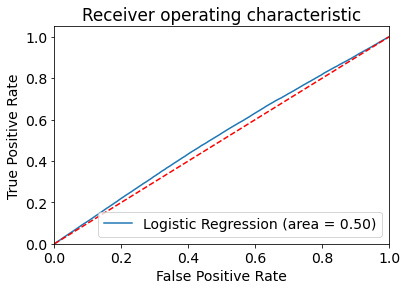

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier

X_train = train[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.11072745 0.1603026  0.40548953 ... 0.07729761 0.63065804 0.10409085]


In [15]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)


[[335707   4506]
 [ 52949   6838]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    340213
         1.0       0.60      0.11      0.19     59787

    accuracy                           0.86    400000
   macro avg       0.73      0.55      0.56    400000
weighted avg       0.82      0.86      0.81    400000



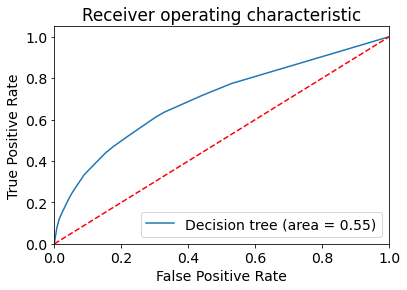

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

## Scoring New Data

### Prepare data for scoring

In [18]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick you champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [19]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Preform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_contact=DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.289052
1,2000002.0,0.630658
2,2000003.0,0.630658
3,2000004.0,0.378129
4,2000005.0,0.527542


### Predict 'probability of giving' for members who were not contacted

In [20]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Preform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.110727
1,2000002.0,0.104091
2,2000003.0,0.077298
3,2000004.0,0.077298
4,2000005.0,0.077298


In [21]:
result = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result.sort_values(by=['ID'], inplace=True)
result.sample(10)

,ID,ProbContact,ProbNoContact
578692,2578693.0,0.332331,0.077298
637243,2637244.0,0.284710,0.167228
405072,2405073.0,0.630658,0.077298
860445,2860446.0,0.367328,0.110727
856154,2856155.0,0.154572,0.077298
585005,2585006.0,0.378129,0.226495
130090,2130091.0,0.367328,0.142009
206771,2206772.0,0.154572,0.077298
148786,2148787.0,0.283237,0.077298
837694,2837695.0,0.154572,0.077298


## Exporting Results to a CSV File

In [22]:
result.to_csv('Round2_Output_prob.csv', index=False)